<a href="https://colab.research.google.com/github/rakenputra/machine-learning/blob/main/Week%208/SVM_Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Raken Putra Athallah

1103204186

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
import pandas as pd

# Ganti 'file_path.csv' dengan jalur file CSV sesuai kebutuhan Anda
file_path = '/content/gdrive/MyDrive/Dataset/Air_water_quality.csv'

# Membaca file CSV menjadi DataFrame
df = pd.read_csv(file_path)

# Tampilkan DataFrame
df

,City,"""Region""","""Country""","""AirQuality""","""WaterPollution"""
0,New York City,"""New York""","""United States of America""",46.816038,49.504950
1,"Washington, D.C.","""District of Columbia""","""United States of America""",66.129032,49.107143
2,San Francisco,"""California""","""United States of America""",60.514019,43.000000
3,Berlin,"""""","""Germany""",62.364130,28.612717
4,Los Angeles,"""California""","""United States of America""",36.621622,61.299435
...,...,...,...,...,...
3958,Yanbu,"""Medina Province""","""Saudi Arabia""",0.000000,50.000000
3959,Cordoba,"""Andalusia""","""Spain""",85.714286,8.333333
3960,Vic,"""Catalonia""","""Spain""",100.000000,0.000000
3961,Segovia,"""Castile and Leon""","""Spain""",100.000000,0.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               3963 non-null   object 
 1    "Region"          3963 non-null   object 
 2    "Country"         3963 non-null   object 
 3    "AirQuality"      3963 non-null   float64
 4    "WaterPollution"  3963 non-null   float64
dtypes: float64(2), object(3)
memory usage: 154.9+ KB


In [15]:
# Display the column names to ensure correct reference
print(df.columns)

Index(['City', ' "Region"', ' "Country"', ' "AirQuality"',
       ' "WaterPollution"'],
      dtype='object')


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'AirQuality' is the independent variable (X) and 'WaterPollution' is the dependent variable (y)
X = df[[' "AirQuality"']]
y = df[' "WaterPollution"']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM model
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 545.5235217717825


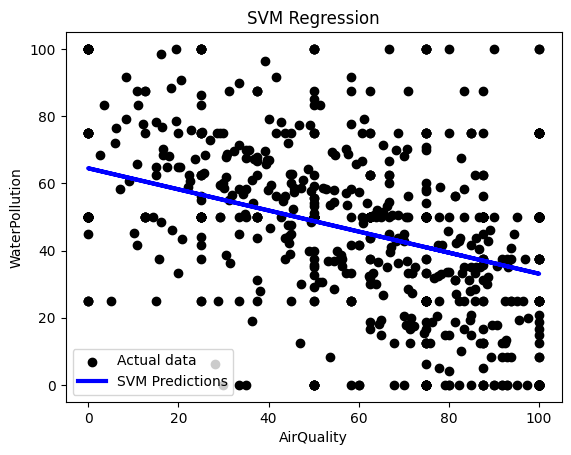

In [17]:
# Plot the results
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='SVM Predictions')
plt.xlabel('AirQuality')
plt.ylabel('WaterPollution')
plt.title('SVM Regression')
plt.legend()
plt.show()